In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

## Načitanie dát

In [ ]:
dataset = pd.read_csv('../Data/final_dataset_cnt.csv')

## Dataset


In [ ]:
dataset.shape

(816, 2)

In [ ]:
dataset.head()

,author_id,processed_text
0,594,tall dark dressed black simplicity nun little ...
1,594,prince duke said quietly sent host speak unoff...
2,594,yes 's part job ai n't supposing divorce wante...
3,594,moment rate almost unnaturally pale colouring ...
4,594,received scant favour hands represented solid ...


In [ ]:
print((dataset['processed_text']).isnull().sum())

0


In [ ]:
print((dataset['author_id']).isnull().sum())

0


In [ ]:
dataset['word_count'] = dataset['processed_text'].apply(lambda x: len(x.split()))
dataset['char_count'] = dataset['processed_text'].apply(lambda x: len(x.replace(" ", "")))

average_word_count = dataset['word_count'].mean()
average_char_count = dataset['char_count'].mean()

print(f"Priemerný počet slov: {average_word_count}")
print(f"Priemerný počet znakov (bez medzier): {average_char_count}")

Priemerný počet slov: 9230.308823529413
Priemerný počet znakov (bez medzier): 54112.694852941175


In [ ]:
all_words_set = set()

for text in dataset['processed_text']:
    all_words_set.update(text.split())

total_unique_words = len(all_words_set)

print(f"Celkový počet unikátnych slov v datasete: {total_unique_words}")

Celkový počet unikátnych slov v datasete: 138701


In [ ]:
x = 5000
long_texts = dataset['processed_text'].apply(lambda text: len(text.split()) > x)

num_long_texts = long_texts.sum()

print(f"Počet vstupov s viac ako {x} slovami je: {num_long_texts}")

Počet vstupov s viac ako 5000 slovami je: 446


In [ ]:
author_counts = dataset['author_id'].value_counts()
print(author_counts)

author_id
1181    86
1626    74
3141    69
213     63
69      59
594     57
505     49
8137    49
204     42
120     42
1060    37
65      35
1758    27
45      23
5166    22
585     22
1230    22
791     20
410      9
17       9
Name: count, dtype: int64


In [ ]:
print('Počet autorov: ', len(dataset['author_id'].unique()))

Počet autorov:  20


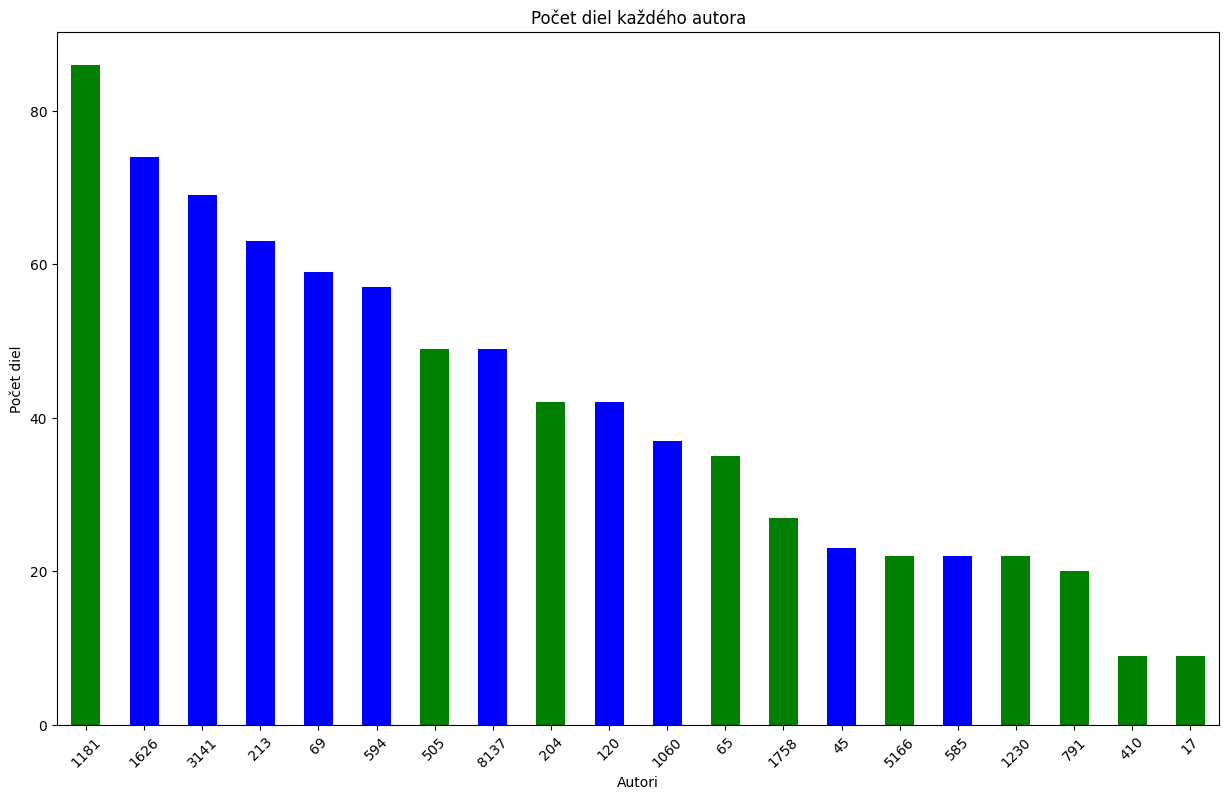

In [ ]:
colors = ['blue' if author_id in [120, 45, 585, 367, 594, 1626, 3141, 69, 213, 8137, 1060] else 'green' for author_id in author_counts.index]


plt.figure(figsize=(15, 9))
author_counts.plot(kind='bar', color=colors)
plt.title('Počet diel každého autora')
plt.xlabel('Autori')
plt.ylabel('Počet diel')
plt.xticks(rotation=45)
plt.show()